# The uncertainty principle

The uncertainty principle is one of the most celebrated parts of quantum mechanics, but at the same time it is also one of the most misintrepreted.

In this exercise we will explicitly see the uncertainty principle at work and at the same time exemplify some of the pitfalls that often leads to misintrepretations of the uncertainty principle. 

**Learning goal:** To be able to apply the uncertainty principle to two operators in a given state.

**Background**

The uncertaintly principle is a statement which is relevant if we want to measure two different physical quantities for a given quantum system. So let's consider two Hermitian operators $A$ and $B$ which represent the two physical quantities. 

You will find a deriviation of the uncertainty principle in most textbooks on quantum physics, see f.ex. section 3.5.1 Griffiths and Schroeter (3ed) or section 1.4.5 Sakurai and Napolitano (3ed). The principle is typically stated as 

\begin{equation}
\sigma_A^2\sigma_B^2 \geq \left(\frac{1}{2i}\left\langle\big[A,B\big]\right\rangle\right)^2 \ .
\end{equation}

Now there is a lot going on in this formula, and a lot of it is hidden in the quite compact notation we use! Most importantly note that the uncertainty principle is a statement about expectation values in a given state: Both $\sigma_A^2$, $\sigma_B^2$ and $\left\langle\big[A,B\big]\right\rangle$ are expectation values in a given state $|\psi\rangle$. To see this let's write things out more explicitly. We have on the left hand side the variance

\begin{equation}
\sigma_A^2 =\big\langle \psi|A^2|\psi\big\rangle-\big\langle \psi|A|\psi\big\rangle^2
\end{equation}

and likewise for $B$. On the right hand side we have the expectation value of commutator  

\begin{equation}
\left\langle\big[A,B\big]\right\rangle = \left\langle\psi|\big[A,B\big]|\psi\right\rangle \ .
\end{equation}


So the uncertainty principle is a statement about the variances in a given state of two physical operators and the expectation value of their commutator in the same state. The state can be anything we like but it must be the same state used in all expectation values.



**The operators we will work with**

In order to get a better understanding of what the uncertainty principle implies we will work through a specific example. To keep things simple we will work only with a single qubit such that our Hilbert space is two dimensional. 

As the physical observables we will choose the Hermitian operators $M_x$ and $M_y$, which expressed in the basis $|0\rangle$ and $|1\rangle$ becomes

\begin{equation}
M_x=\frac{1}{2}\left(\begin{array}{cc} 1 & 1 \\ 1 & 1 \end{array}\right) 
\end{equation}

and

\begin{equation}
M_y=\frac{1}{2}\left(\begin{array}{cc} 1 & i \\ -i & 1 \end{array}\right) \ .
\end{equation}

**Note:** The oprators $M_x$ and $M_y$ are just rotated versions of our standard measuring operator 

\begin{equation}
M=\left(\begin{array}{cc} 0 & 0 \\ 0 & 1 \end{array}\right) \ .
\end{equation}

That is, $M_x=R_y(-\pi/2)MR_y(\pi/2)$ and $M_y=R_x(\pi/2)MR_x(-\pi/2)$, where $R_x$ and $R_y$ are rotations about the respective axis. Since these are unitary rotations the eigenvalues of $M_x$ and $M_y$ are exactly the same as of $M$, namely $0$ and $1$.



**Exercise 1:** Determine the commutator $[M_x,M_y]$, which will enter on the right hand side of the ucertainty principle.



**The state we will work with**

The uncertainty principle is a statement about expectation values in some state $|\psi\rangle$. It holds for any state, and as an example of a state we will choose $|0\rangle$.

**Exercise 2:** Determine the expectation value of the commutator $[M_x,M_y]$ in the state $|0\rangle$, ie. compute $\langle 0|[M_x,M_y]|0\rangle$.

Now we could go on an compute $\sigma_{M_x}$ and $\sigma_{M_y}$ in the state $|\psi\rangle$ as well, and check that the uncertainty principle is satisfied (if you like by all means go ahead and do so, it is a nice exercise). But rather than doing analytic computations let's try to do several experiments and determine $\sigma_{M_x}$ and $\sigma_{M_y}$ from these. These experiments will (hopefully) give a better understanding of what the uncertainty principle does and does not state.  


Let's first import the relevant packages

In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from math import pi, sqrt

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

Let's try to determine the variances that are on the left hand side of the uncertainty relation.

**Step 1:** Measure $M_x$ many times. 

To determine the variance $\sigma_{M_x}$ we need to measure measure $M_x$ in the state $|0\rangle$ many times and see how the result varies. By default QisKit always starts with the state $|0\rangle$ so we get the state we want automatically. To measure $M_x$ we must first rotate the measuring device such that it measures along the $x$-axis rather than along the $z$-axis (which is default). To do so we add a rotation by $\pi/2$ about the $y$-axis. 

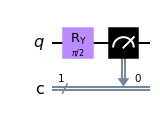

In [2]:
circ = QuantumCircuit(1,1)
circ.ry(pi/2,0)
circ.measure(0,0)
circ.draw()

Now let's run it 1024 times.


**Note:** Each time we do the experiment we start the system in the state $|0\rangle$.

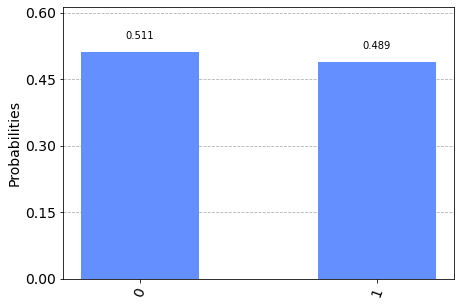

In [3]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

sim = Aer.get_backend('qasm_simulator')  # this is the simulator we'll use
qobj = assemble(circ)  # this turns the circuit into an object our backend can run
result = sim.run(qobj).result()  # we run the experiment and get the result from that experiment
# from the results, we get a dictionary containing the number of times (counts)
# each result appeared
counts = result.get_counts()
# and display it on a histogram
plot_histogram(counts)

In [4]:
counts

{'0': 523, '1': 501}

**Exercise 3:** Show that if we have $n$ measurements of an operator, $M$, with eigenvalues 0 and 1, then we can get the variance by 

\begin{equation}
\sigma_M^2 =\frac{1}{n}\left(n_1 (1-{\bar m})^2 + n_0 {\bar m}^2\right)
\end{equation}

where $n_0$ ($n_1$) are the number of measurements that gave the result 0 (1) and

\begin{equation}
{\bar m} = \frac{n_1}{n} 
\end{equation}

is the average of the measurements.

**Exercise 4:** 
Compute the variance, $\sigma_{M_x}^2$, of $M_x$ in the state $|0\rangle$ from the experimental data just obtained.

**Step 2:** Now to determine also $\sigma_{M_y}^2$, let's measure $M_y$ many times. 

**Note:** Each time we do the experiment we again start the system in the state $|0\rangle$. We do so because we want to measure the variance of $M_y$ in the state $|0\rangle$. This is the quantity which enters the uncertainty relation.

This time to alighn the measuring device with the $y$-axis we perform a rotation about the $x$-axis through the angle $-\pi/2$.

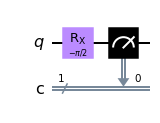

In [5]:
circ = QuantumCircuit(1,1)
circ.rx(-pi/2,0)
circ.measure(0,0)
circ.draw()

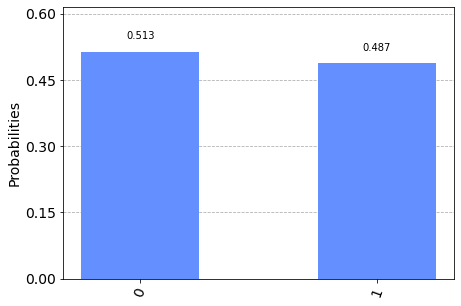

In [6]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

sim = Aer.get_backend('qasm_simulator')  # this is the simulator we'll use
qobj = assemble(circ)  # this turns the circuit into an object our backend can run
result = sim.run(qobj).result()  # we run the experiment and get the result from that experiment
# from the results, we get a dictionary containing the number of times (counts)
# each result appeared
counts = result.get_counts()
# and display it on a histogram
plot_histogram(counts)

In [7]:
counts

{'0': 525, '1': 499}

As you most likely have guessed we now want to:

**Exercise 5:** Compute the variance, $\sigma_{M_y}^2$, of $M_y$ in the state $|0\rangle$ from the experimental data just obtained.

**Exercise 6:** Use the values you have just obtained experimentally for $\sigma_{M_x}^2$ and $\sigma_{M_y}^2$ as well a as your result from Exercise 2 to check if the Uncertainty principle is statisfied for the specific operators and state we have just considered ($M_x$, $M_y$ and $|\psi\rangle=0$).

**Note:** As we do not have infinite statistics here, our experimental values for the variaces of $M_x$ and $M_y$ in the state $|0\rangle$ are are not exact. 

**Summary, this far:** We have now explicitly performed experiments to determine the variances that enter the uncertainty relation. This hopefully have given you a good insight into what the uncertainty princciple is a statement about.

**A common misintrepretation** 

Now that we have explicitly seen what the uncertainty principle states, let's look at a common misintrepretation.

We start again with a measurement of $M_x$ and this time we only need to do it once.

We put the system in the state $|0\rangle$, rotate the measuring devise and measure $M_x$. Here we go!

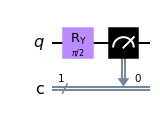

In [8]:
circ = QuantumCircuit(1,1)
circ.ry(pi/2,0)
circ.measure(0,0)
circ.draw()

In [9]:
simulator = Aer.get_backend('aer_simulator')

# result = simulator.run(circ).result()
# counts = result.get_counts(circ)
# plot_histogram(counts, title='Bell-State counts')

result = simulator.run(circ, shots=1, memory=True).result()
memory = result.get_memory(circ)
print(memory)

['0']


OK, so now we have measured $M_x$ and we got some value (0 or 1). Suppose we now want to measure $M_y$ as well. First we need to rotate the measuring device such that it measures along the $y$-axis. Since it at present measures along the $x$-axis we simply need to rotate it by $\pi/2$ around the $z$-axis.
 
So we rotate the measuring devise to the $y$-axis and then measure $M_y$

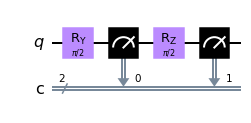

In [10]:
circ = QuantumCircuit(1,2)
circ.ry(pi/2,0)
circ.measure(0,0)
circ.rz(pi/2,0)
circ.measure(0,1)
circ.draw()

In [14]:
simulator = Aer.get_backend('aer_simulator')

# result = simulator.run(circ).result()
# counts = result.get_counts(circ)
# plot_histogram(counts, title='Bell-State counts')

result = simulator.run(circ, shots=1, memory=True).result()
memory = result.get_memory(circ)
print(memory)

['00']


**How to read the result:** The rightmost digit is the outcome of the measurement of $M_x$ and the leftmost of $M_y$.

**Wait!?** 

We just got a value for both the measurement of $M_x$ and of $M_y$! But $wait$ did the uncertainty principle not tell us that this was impossible? 

**No!** If you do a measurement you will always get some result and if you do two measurements you will always get two results. The first measurement can (an most likely will) affect the result of the second measurement, and if we had done the two measurements in the opposite order the result most likely would have been different (see the exercise on repeated measurements). But it is possible to do the two measurements, however **only one after the other**.

**Take home:** The uncertainty principle is a relation between expectation values of quantum mechanical operators. Hence it is a statement about how the results of a measurement vary when repeated many times (just as we did in the first part above). It is only possible to obtain a zero variance of two different operators in a given state if the expectationvalue of the commutator of these two operators vanish.

This exercise hopefully has helped you to understand how to (and not to) interpret the uncertainty principle. 